Example of image compression with DWT.
Based on examples from:

1.Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control, Brunton and Kutz, Chapter 6 Sec 5. http://databookuw.com

2. Prof. B. Hosseini.


(1500, 1000)


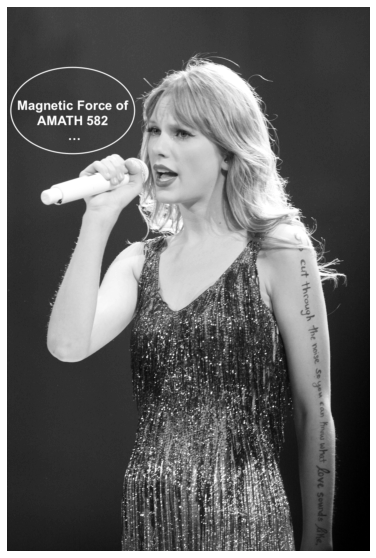

In [110]:
# Using the PyWavelets module, available at 
# https://pywavelets.readthedocs.io/en/latest/install.html

from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Convert RGB to grayscale
# A = imread('TS1.jpg')
# B = color.rgb2gray(A)

B = np.mean(A, -1); # Convert RGB to grayscale
plt.figure(figsize=(10,10))
plt.imshow(B,cmap='gray')
plt.axis('off')

print(B.shape)

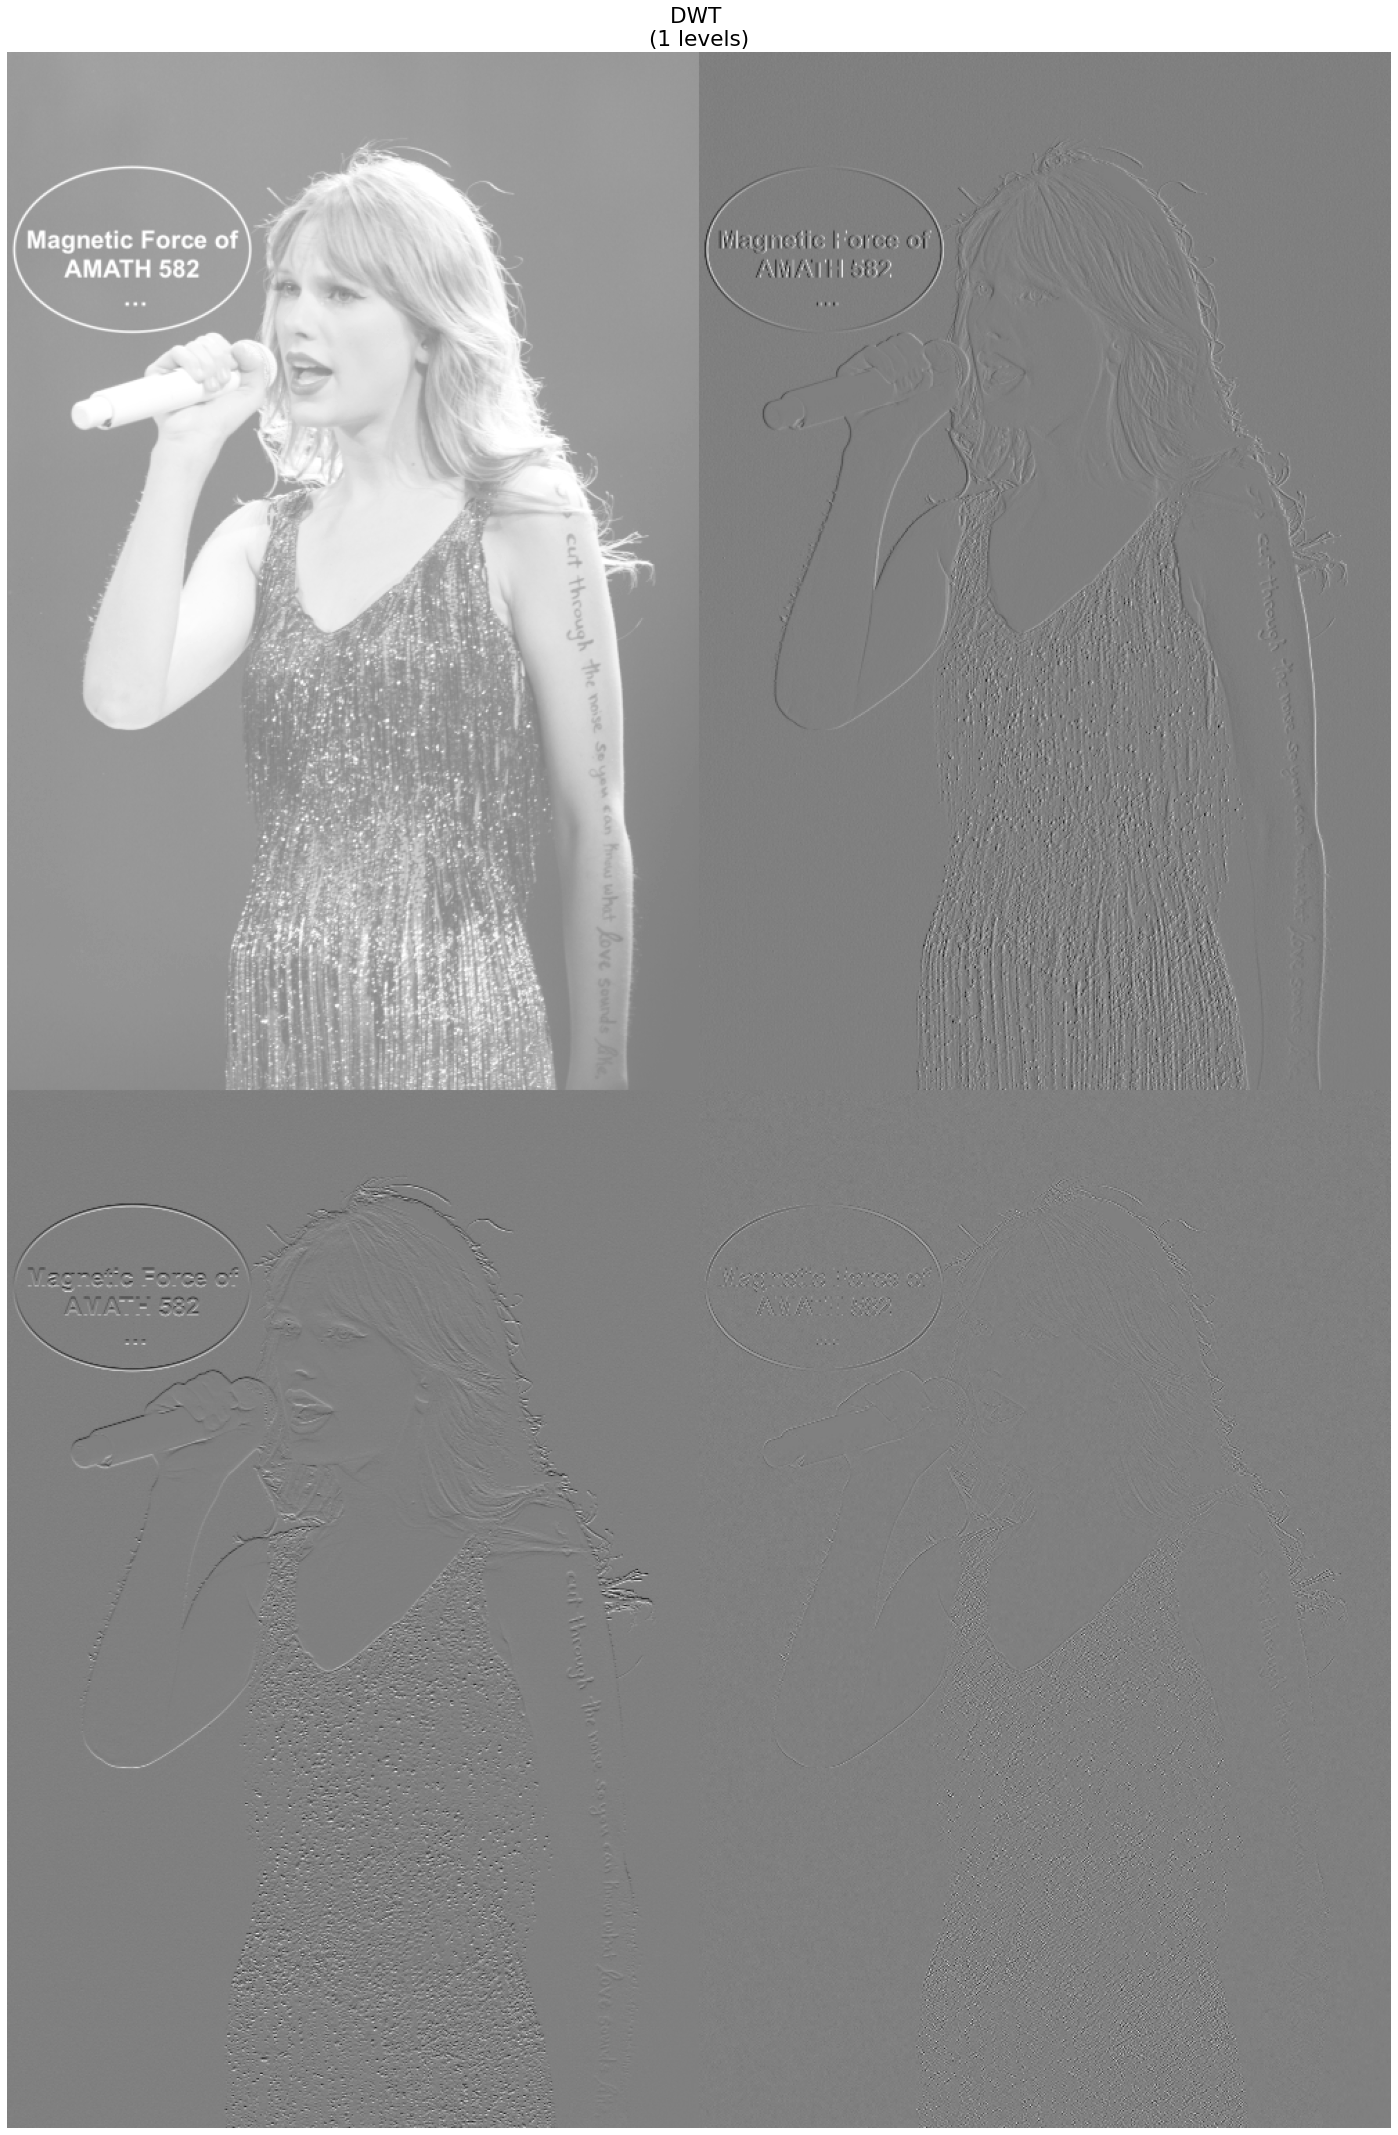

In [126]:
## Wavelet Compression

import copy

n = 1
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

c = copy.deepcopy(coeffs)

# normalize each coefficient array independently for better visibility
c[0] /= np.abs(c[0]).max()
for detail_level in range(n):
  c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]


# plot the normalized coefficients
arr, slices = pywt.coeffs_to_array(c)

fig, axes = plt.subplots(figsize=[30, 30])

axes.imshow(arr, cmap=plt.cm.gray)
axes.set_title('DWT \n({} levels)'.format(n))
axes.set_axis_off()

plt.tight_layout()
plt.show()


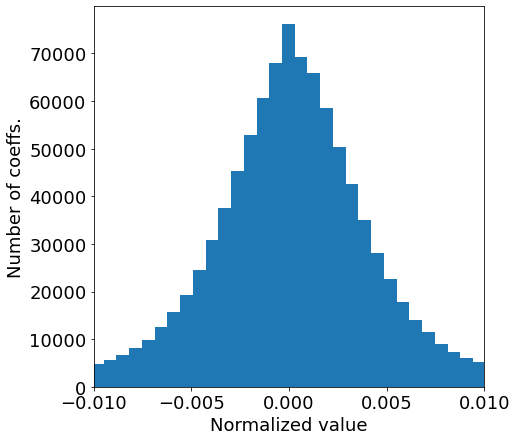

In [127]:
# compute max level transform of the image and plot histogram of coefficients

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

coeff_arr_normalized = coeff_arr/np.abs(coeff_arr).max()


fig, axes = plt.subplots(figsize=[7, 7])
plt.hist(coeff_arr_normalized.flatten(), bins=2000)

plt.xlim(-0.01, 0.01)
plt.xlabel('Normalized value')
plt.ylabel('Number of coeffs.')
plt.show()

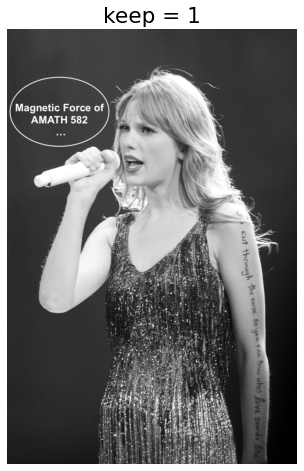

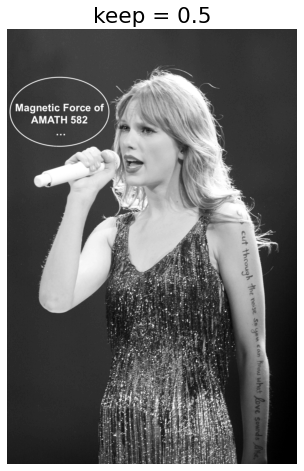

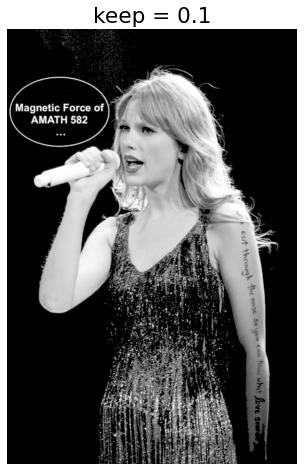

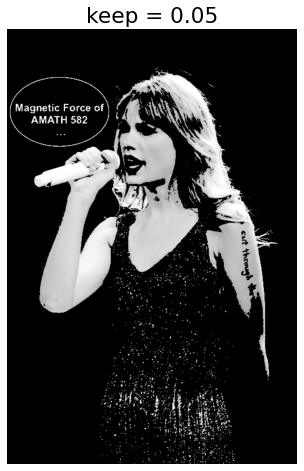

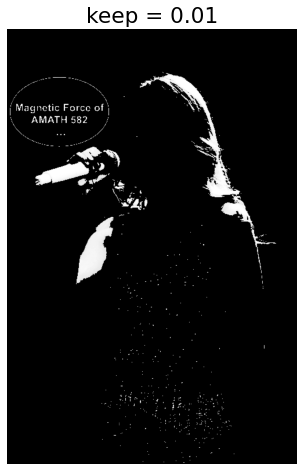

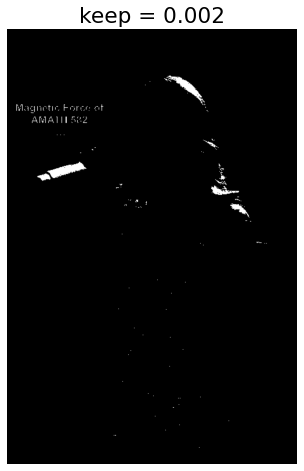

In [128]:
coeff_arr1, coeff_slices1 = pywt.coeffs_to_array(coeffs)
Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (1, 0.5, 0.1, 0.05, 0.01, 0.002):
    

    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr1) > thresh
    Cfilt = coeff_arr1 * ind # Threshold small indices
    
#   print(np.sum(ind)/(B.shape[0]*B.shape[1]))
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices1,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))